In [2]:
# モジュールのインポート
import networkx as nx
from networkx.algorithms import community
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

# NetworkXライブラリ

In [3]:
# 空の無向グラフの作成
G = nx.Graph()

In [6]:
# グラフにノード追加
G.add_node(1)
G.add_node('one')

# グラフに属性付きノード追加
## 任意のオブジェクトを付加可能
G.add_node(2, weight=5)
G.add_node(3, name=['node', 'number', 'three'])

# リストの要素からノード追加
# 集合、辞書、グラフなども追加可能
G.add_nodes_from([4,5,6])

In [7]:
# グラフに含まれる全てのノードをリストとして返す
print(G.nodes)
print(G.nodes.data())

[1, 'one', 2, 3, 4, 5, 6]
[(1, {}), ('one', {}), (2, {'weight': 5}), (3, {'name': ['node', 'number', 'three']}), (4, {}), (5, {}), (6, {})]


In [24]:
# グラフにエッジ追加
## エッジには属性を付けられる
G.add_edge(1, 2)
G.add_edge(2, 3, weight=10, name='edge from 2 to 3')

# タプルを要素としたリストからedge追加
G.add_edges_from([(3,4),(3,5),(2,4)])

# 重み付きエッジを追加
# タプルの三番目の要素が重みになっている
G.add_weighted_edges_from([(4,5,20), (5,6,30)])

In [25]:
# グラフに含まれるすべてのエッジをリストとして返す
print(G.edges)
print(G.edges.data())

[(1, 2), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (5, 6)]
[(1, 2, {}), (2, 3, {'weight': 10, 'name': 'edge from 2 to 3'}), (2, 4, {}), (3, 4, {}), (3, 5, {}), (4, 5, {'weight': 20}), (5, 6, {'weight': 30})]


In [14]:
# ノードに隣接するノード
print(list(G.neighbors(2)))

# ノードに隣接するノードの情報の辞書を返す
print(G[2])
print(G.adj[2])

# エッジの情報
print(G[2][3])
print(G.edges[2, 3])

# エッジの属性
print(G[2][3]['name'])
print(G.edges[2, 3]['weight'])

[1, 3, 4]
{1: {}, 3: {'weight': 10, 'name': 'edge from 2 to 3'}, 4: {}}
{1: {}, 3: {'weight': 10, 'name': 'edge from 2 to 3'}, 4: {}}
{'weight': 10, 'name': 'edge from 2 to 3'}
{'weight': 10, 'name': 'edge from 2 to 3'}
edge from 2 to 3
10


In [16]:
# グラフからノードとそのノードに接続するすべてのエッジを削除
G.remove_node('one')

# グラフからエッジを削除
G.remove_edge(4,5)

# グラフからすべてのノードとエッジを削除
#　G.clear

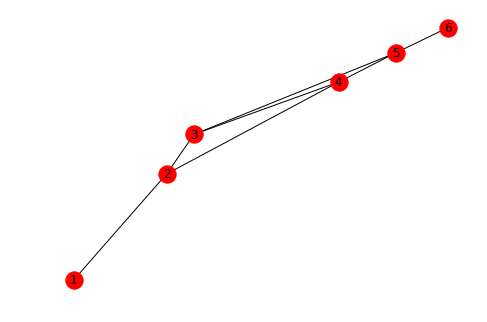

In [26]:
nx.draw(G, with_labels=True)

In [27]:
# エッジがあるかの確認
print(G.has_edge(1,2))
print(G.has_edge(1,3))

True
False


In [28]:
# nodeの数: len
# edgeの数: .size()
print(len(G))
print(G.size())

6
7


In [29]:
# エッジの重みを1に
G[2][3]['weight']=1
G[5][6]['weight']=1
# 隣接行列
print(nx.adjacency_matrix(G))
print(nx.adjacency_matrix(G).toarray())

  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1
  (3, 4)	20
  (4, 2)	1
  (4, 3)	20
  (4, 5)	1
  (5, 4)	1
[[ 0  1  0  0  0  0]
 [ 1  0  1  1  0  0]
 [ 0  1  0  1  1  0]
 [ 0  1  1  0 20  0]
 [ 0  0  1 20  0  1]
 [ 0  0  0  0  1  0]]


In [30]:
# 最短経路
path = nx.shortest_path(G)
print(path[1][6])
print(path[4][6])

# ノード1からの最短経路
print(nx.shortest_path(G,1))

# ノード1と6の間の最短経路
print(nx.shortest_path(G,1,6))

# ノード1と6の間の最短経路長
print(nx.shortest_path_length(G,1,6))

[1, 2, 3, 5, 6]
[4, 5, 6]
{1: [1], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 4], 5: [1, 2, 3, 5], 6: [1, 2, 3, 5, 6]}
[1, 2, 3, 5, 6]
4


In [31]:
#平均最短距離
print(nx.average_shortest_path_length(G))
#平均クラスタリング係数
print(nx.average_clustering(G))

1.8
0.3333333333333333


In [33]:
# 次数中心性 (次数/ネットワークの最大次数（n-1)で標準化)
print(nx.degree_centrality(G))
# 近接中心性
print(nx.closeness_centrality(G))
# 媒介中心性
print(nx.betweenness_centrality(G))

{1: 0.2, 2: 0.6000000000000001, 3: 0.6000000000000001, 4: 0.6000000000000001, 5: 0.6000000000000001, 6: 0.2}
{1: 0.4166666666666667, 2: 0.625, 3: 0.7142857142857143, 4: 0.7142857142857143, 5: 0.625, 6: 0.4166666666666667}
{1: 0.0, 2: 0.4, 3: 0.2, 4: 0.2, 5: 0.4, 6: 0.0}


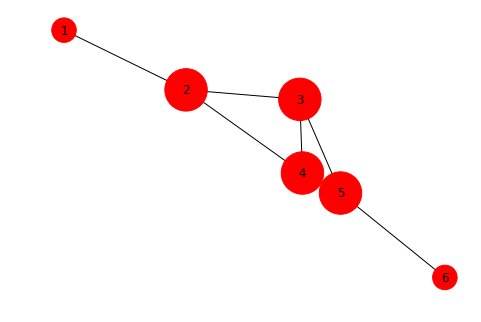

In [34]:
# 媒介中心性の値でノードの大きさを変えて可視化する
node_size = np.array(list((nx.degree_centrality(G)).values()))
nx.draw(G, with_labels=True,  node_size = [v * 3000 for v in node_size])

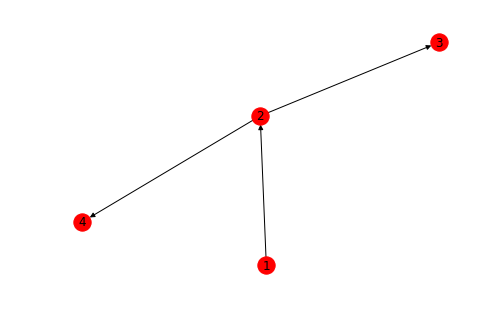

In [35]:
# 有効グラフの作成（ただし自己閉路を含まない）
DiG = nx.DiGraph()
DiG.add_edges_from([(1,2),(2,3),(2,4)])
nx.draw(DiG, with_labels=True)

In [37]:
# 有向グラフにおける点の後続点
print (list(DiG.successors(2)))

# 有向グラフにおける点の先行点
print(list(DiG.predecessors(2)))

# ノードの次数
print(DiG.degree(2))

# ノードの入次数
print(DiG.in_degree(2))

# ノードの出次数
print(DiG.out_degree(2))

#グラフの各ノードの次数
print(list(DiG.degree))

[3, 4]
[1]
3
1
2
[(1, 1), (2, 3), (3, 1), (4, 1)]


# ネットワーク分析

## Q1

networkxに含まれるデータセットである空手クラブのソーシャルネットワークからグラフオブジェクトを作成する。

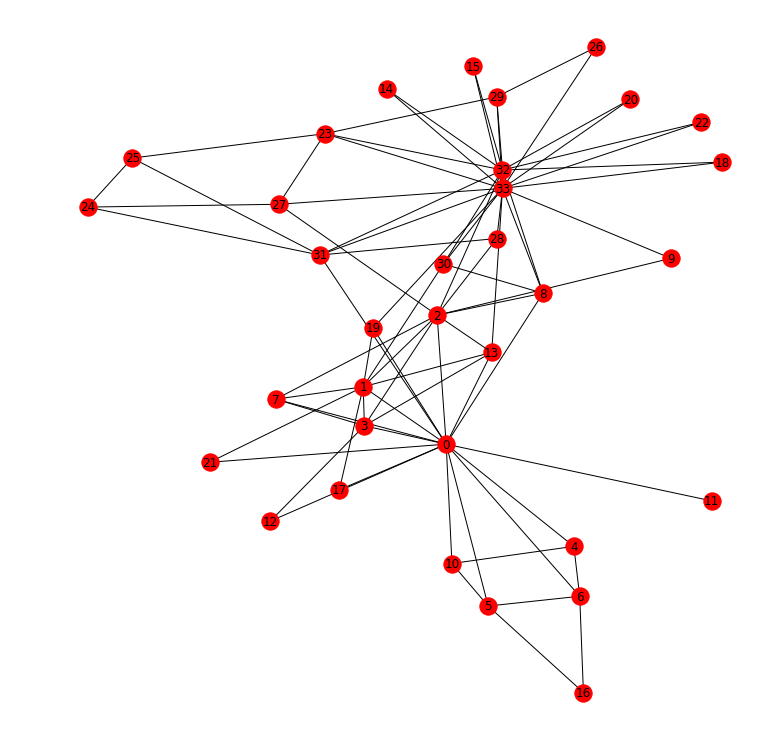

In [40]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
nx.draw(G, pos=pos, with_labels=True)

In [41]:
# ノード数とエッジ数
print(len(G))
print(G.size())

34
78


In [42]:
# 隣接行列の取得
adj_matrix = nx.adjacency_matrix(G).toarray()
print(adj_matrix)

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


### Q1.1

ネットワークのノードをキー、そのノードに隣接しているノードのリストを値として持つ辞書として、隣接リストを表すことを考える。隣接行列を受け取って隣接リストを返す関数を完成させよ。

In [43]:
def get_adj_list(adj_matrix):
    all_adj_list = []
    key_list = []
    for i in range(len(adj_matrix)):
        adj = []
        for j in range(len(adj_matrix)):
            if adj_matrix[i][j] == 1:
                adj.append(j)
        all_adj_list.append(adj)
        key_list.append(i)
    
    adj_list = dict(zip(key_list, all_adj_list))
    
    return adj_list

In [44]:
adj_list=get_adj_list(adj_matrix)

print(adj_list[0])
print(adj_list[33])

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]
[8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32]


### Q1.2

幅優先探索のアルゴリズムを用いて、第1引数として隣接リスト、第2引数として始点ノードのラベルを受け取り、始点から各ノードへの距離の辞書dを返す以下のbfs関数を完成させてください。

In [45]:
from collections import deque

def bfs(g, s):
    # g: 隣接リスト
    # s: 始点ノードのラベル
    
    Q = deque()
    visited = {}
    d = {}
    for i in g.keys():
        d[i] = np.inf
        visited[i] = False
    
    visited[s] = True
    d[s] = 0
    Q.append(s)
    distance = 0
    
    while Q:
        n = Q.popleft()
        
        for an in g[n]:
            if visited[an] == False:
                Q.append(an)
                visited[an] = True
                d[an] = d[n]+1
    
    return d

In [46]:
d1=bfs(adj_list, 0)
print(d1[26])

d2=bfs(adj_list, 11)
print(d2[26])

3
4


## Q2

以下では、Q1で用いた空手クラブのソーシャルネットワークデータについて各ノードの次数中心性を計算し、次数中心性の上位のノードを表示している。

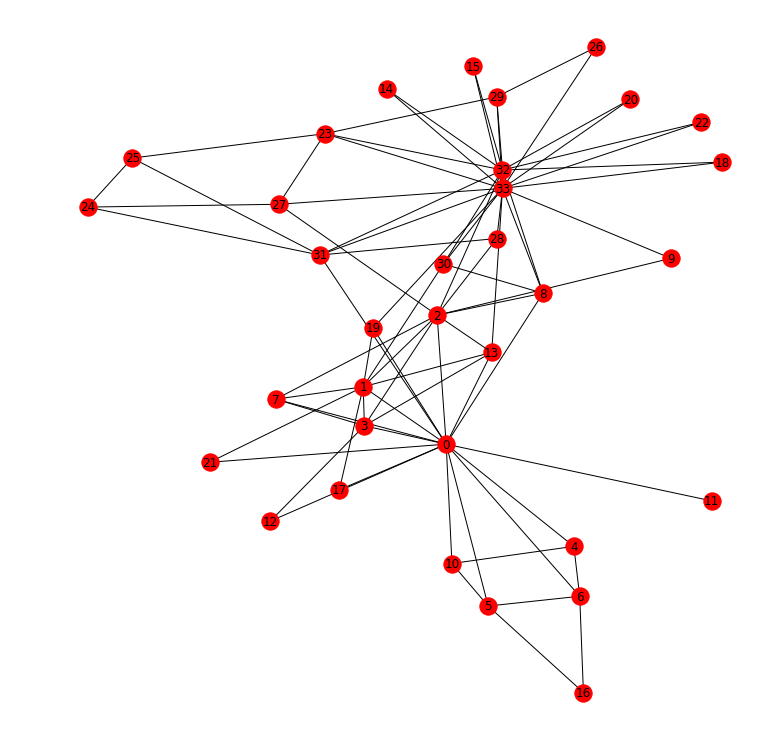

In [47]:
G = nx.karate_club_graph()
plt.figure(figsize=(10,10)) 
nx.draw(G, pos=pos, with_labels=True) 

In [48]:
# 次数中心性 (次数/最大次数（N-1))
degree=nx.degree_centrality(G)
print(pd.Series(degree).sort_values(ascending=False).head(5)) 

33    0.515152
0     0.484848
32    0.363636
2     0.303030
1     0.272727
dtype: float64


In [51]:
closeness = nx.closeness_centrality(G)
print(pd.Series(degree).sort_values(ascending=False).head(5))

betweenness = nx.betweenness_centrality(G)
print(pd.Series(degree).sort_values(ascending=False).head(5))

eigenvector = nx.eigenvector_centrality(G)
print(pd.Series(degree).sort_values(ascending=False).head(5))

33    0.515152
0     0.484848
32    0.363636
2     0.303030
1     0.272727
dtype: float64
33    0.515152
0     0.484848
32    0.363636
2     0.303030
1     0.272727
dtype: float64
33    0.515152
0     0.484848
32    0.363636
2     0.303030
1     0.272727
dtype: float64


### Q2.2
以下では各ノードのPageRankを計算する関数を実装する。pagerank_centrality関数は、第1引数としてネットワークの隣接行列、第2引数としてダンピング係数（通常移動とテレポート移動の割合を指定）、第3引数としてベキ乗法の繰り返し回数を受け取り、各ノードのPageRankを要素とするベクトルを返す。ベクトルの各要素のインデックスはノードのラベルに対応します。

PageRankを更新するための行列$B$はダンピング係数を$\alpha$、推移確率行列を$A$として以下のように定義されます。行列$A$はネットワークの隣接行列について、すべての要素が0の列があればその列のすべての要素を1とした上で、隣接行列の各要素についてその列の和で割ったもの。

$B=\alpha A+\frac{1-\alpha}{ノード数}$

行列$B$を用いてPageRankのベクトル$x=(x_1,x_2,...,x_n)$は以下のように更新される。

$x=Bx$

$x=x/\Sigma_{i=1}^n x_i$

In [53]:
def pagerank_centrality(adj_matrix, alpha=0.85, t=100):
    # adj_matrix: 隣接行列
    # alpha: ダンピング係数（通常移動とテレポート移動の比率を指定）
    # t: ベキ乗法の繰り返し回数
    
    adj_matrix[:, adj_matrix.sum(0)==0]=1 
    A= adj_matrix/adj_matrix.sum(0) 

    B= alpha*A + (1-alpha) / len(adj_matrix) * np.ones((len(adj_matrix), len(adj_matrix)))
    x= np.ones(len(adj_matrix))
    
    for i in range(t):
        x = np.dot(B, x)
        x = x / np.sum(x)

    return x

In [54]:
adj_matrix=nx.adjacency_matrix(G).toarray()
pagerank=pagerank_centrality(adj_matrix, 0.85, 100)
print(pagerank)
print(pd.Series(pagerank).sort_values(ascending=False).head(5))

[0.09699729 0.05287692 0.05707851 0.03585986 0.02197795 0.02911115
 0.02911115 0.0244905  0.02976606 0.0143094  0.02197795 0.00956475
 0.01464489 0.02953646 0.01453599 0.01453599 0.01678401 0.01455868
 0.01453599 0.01960464 0.01453599 0.01455868 0.01453599 0.03152251
 0.02107603 0.0210062  0.01504404 0.02563977 0.01957346 0.02628854
 0.02459016 0.03715809 0.07169323 0.10091918]
33    0.100919
0     0.096997
32    0.071693
2     0.057079
1     0.052877
dtype: float64


## Q3

空手クラブのソーシャルネットワークデータを用いてコミュニティ抽出を行う。

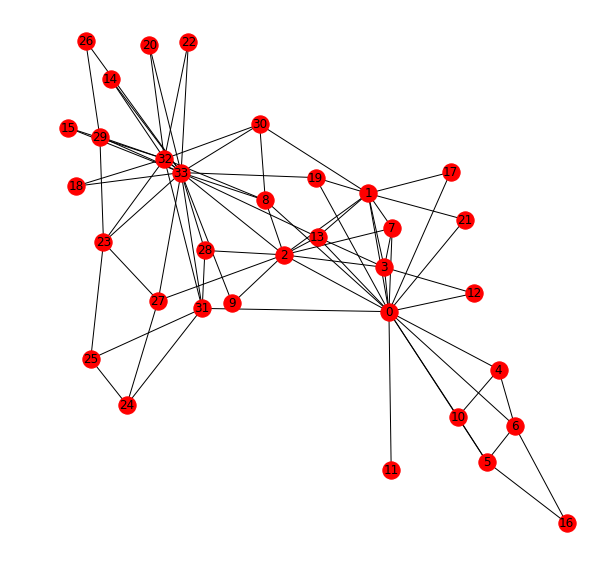

In [55]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos)
_ = plt.axis('off')

### Q3.1
エッジ媒介中心性を用いたコミュニティ抽出（Girvan-Newman法）を行う以下のgirvan_newman関数を完成させる。girvan_newman関数は引数としてnetworkxのグラフオブジェクトを受け取り、ネットワークを2つのコミュニティに分割し、各コミュニティのノード集合を要素としたリストを返す。

In [60]:
def find_best_edge(G): 
    edge_between = nx.edge_betweenness_centrality(G)     
    return max(edge_between, key=edge_between.get)

def girvan_newman(G):
    G = G.copy() 
    removed_edges=[] 
    while nx.number_connected_components(G) ==1: 
        rm_edge = find_best_edge(G)
        print(rm_edge)
        G.remove_edge(*rm_edge)
        removed_edges.append(rm_edge)

    return list(nx.connected_components(G)), removed_edges

In [63]:
communities, removed_edges = girvan_newman(G)
print(removed_edges)
print(communities)

(0, 2)
(0, 8)
(13, 33)
(19, 33)
(2, 32)
(1, 30)
(1, 2)
(2, 3)
(2, 7)
(2, 13)
[(0, 2), (0, 8), (13, 33), (19, 33), (2, 32), (1, 30), (1, 2), (2, 3), (2, 7), (2, 13)]
[{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}]


この処理で抽出されたコミュニティを可視化

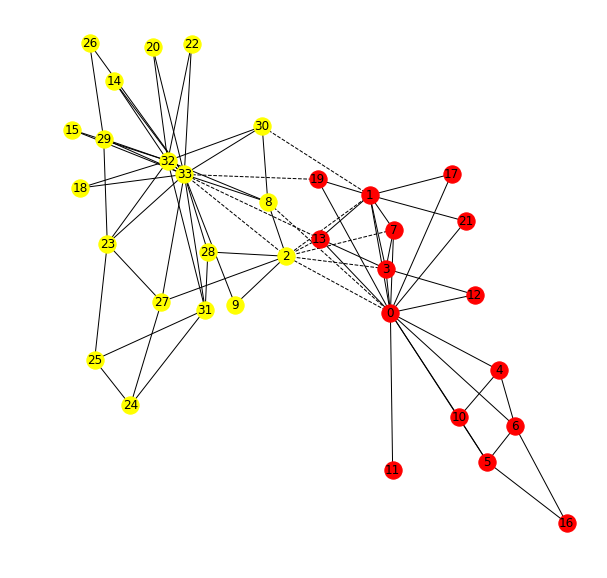

In [62]:
keeped_edges = set(G.edges()) - set(removed_edges)
colors = ['red', 'yellow']

plt.figure(figsize=(10,10))
nx.draw_networkx_edges(G, pos, edgelist=keeped_edges)
nx.draw_networkx_edges(G, pos, edgelist=removed_edges, style='dashed')
for community, color in zip(communities, colors):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=community, node_color=color)
nx.draw_networkx_labels(G, pos=pos)
_ = plt.axis('off')

### Q3.2
modularity関数は、第1引数としてグラフオブジェクト、第2引数として各コミュニティのノード集合を要素としたリスト（上記のgirvan_newman関数の出力と同じ形式のリスト）、を受け取り、ネットワークのモジュラリティを計算して返す。modularity関数を完成させ、Q3.1でコミュニティを抽出した時のネットワークのモジュラリティを求める。

モジュラリティ$Q$は、ネットワークのリンク数を$m$、隣接行列を$A$、ノード$i$の次数を$k_i$とした時、以下で定義される。

$Q = \frac{1}{2m} \sum_{ij} \left( A_{ij} - \frac{k_ik_j}{2m}\right) \delta(c_i,c_j)$

ノード$i$のコミュニティを$c_i$とすると$\delta(c_i,c_j)$はノード$i$と$j$が同じコミュニティの時1、異なるコミュニティの時は0となる。

In [67]:
def modularity(G, communities):
    m = G.number_of_edges() # リンク数
    degree = G.degree() # 各ノードの次数の辞書    
    Q = 0.0 # モジュラリティを初期化
    adj_matrix=nx.adjacency_matrix(G).toarray()

    for i in range(len(G)):
        for j in range(len(G)):
            for k in range(2):
                if (i in communities[k])&(j in communities[k]):
                    Q += adj_matrix[i][j]-(G.degree(i)*G.degree(j))/(2*m)

    Q = Q/(2*m)
    return Q
modularity(G, communities)

0.3709731826614946

In [68]:
communities, removed_edges = girvan_newman(G)
modularity(G, communities)

(0, 2)
(0, 8)
(13, 33)
(19, 33)
(2, 32)
(1, 30)
(1, 2)
(2, 3)
(2, 7)
(2, 13)


0.3709731826614946